In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
dry = pd.read_csv('data\\Dry.csv')
dry.head()
fox = pd.read_csv('data\\Fox.csv')


In [31]:
segmentsDry = set(dry['IX'])
segmentsFox = set(fox['IX'])


In [32]:
dry = dry.sample(frac=0.25)
fox = fox.sample(frac=0.25)

dry = dry.sort_values(['IX', 'AngeloSage'])
fox = fox.sort_values(['IX', 'AngeloSage'])

In [33]:
def dist(x1, y1, x2, y2):
    distance = np.sqrt( (x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [34]:
slopesDry = []
areasDry = []
slopesFox = []
areasFox = []

In [35]:
contourThreshold = 10


In [36]:
###DRY

for segment in segmentsDry:
    df = dry[dry['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasDry.append(df.iloc[i]['flowacc_co'])
                    slopesDry.append((dif/distance)*100)
                    break

                    
                    

In [37]:
###FOX

for segment in segmentsFox:
    df = fox[fox['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasFox.append(df.iloc[i]['flowacc_co'])
                    slopesFox.append((dif/distance)*100)
                    break


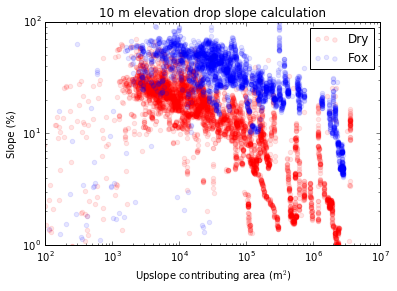

In [38]:
plt.scatter(areasDry,slopesDry,color='red',label='Dry', alpha=0.1)
plt.scatter(areasFox,slopesFox,color='blue',label='Fox', alpha=0.1)
plt.legend(loc='best',numpoints=1)
plt.xlabel(r'Upslope contributing area (m$^2$)')
plt.ylabel('Slope (%)')
plt.xlim([100,10**7])
plt.ylim([1,100])
plt.xscale('log')
plt.yscale('log')
plt.title('10 m elevation drop slope calculation')
plt.savefig('Figs\\ChannelNetwork-SlopeArea-DryFox-10m.pdf')

In [39]:
len(slopes)

NameError: name 'slopes' is not defined